# Derivatives

Espen Sirnes  
2025-03-24

This note provides an introduction to derivative pricing. In finance, a
derivative is an asset or contract whose value depends on another asset.
Consequently, the value of a derivative is a function of the underlying
asset’s value. If the value of the underlying share is known, the
exercise value of an option can be determined immediately.

One of the most common types of derivatives is options. We will begin by
exploring how options are priced and later demonstrate how the
principles of option pricing extend to a wide range of other
derivatives.

# Options

An option is a right but not an obligation to buy or sell an asset for a
certain price. Options can be used for both hedging as well as
speculation.

<figure>
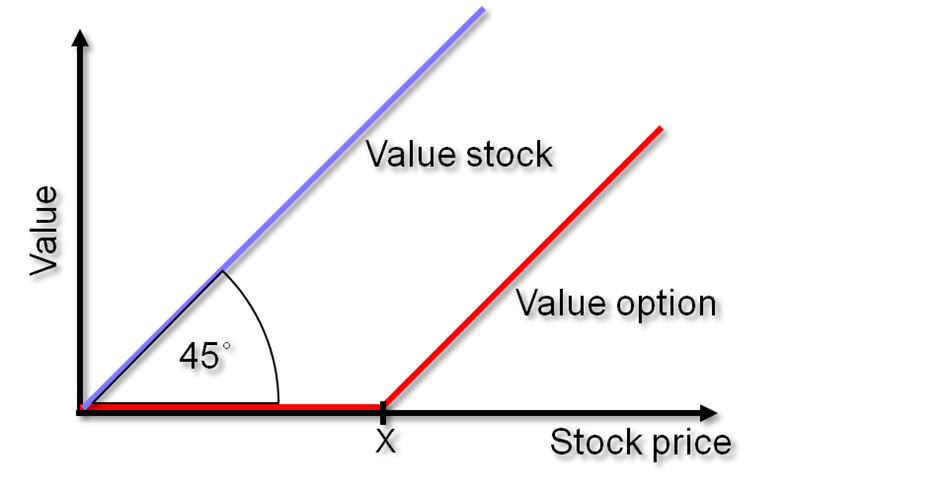
<figcaption aria-hidden="true">Option Value</figcaption>
</figure>

## The cash flow from an option

There are mainly two types of options - put and call options. A call
option gives you the right to buy one share at a fixed price sometime in
the future. Let us say that the price agreed upon for an Equinor share
is 105. This is called the strike price or exercise price. If the share
price is 115 today, you can take advantage of your right to buy it for
105 and sell it in the market for 115. The value of the option is then
15.

However, if the market price is 95, it would be pointless to buy the
stock for 105. Since you do not have any obligation to buy it, you would
not exercise your right since that would lead to a certain loss.
Therefore, the option price can never be negative, since the right to
buy will never be exercised if it leads to a loss. Hence, if C is the
value of the call, S the value of the stock, and X the strike price at
the terminal date, we have

<span id="eq-C">$$
C = \max(S - X, 0)
 \qquad(1)$$</span>

The share price is 115 option holder is thus left with
<span id="eq-C_gain">$$
= \max(115-105, 0) = 10
 \qquad(2)$$</span> But if the price falls to 95, the option loses its
entire value <span id="eq-C_loss">$$
= \max(95-105, 0) = 0
 \qquad(3)$$</span>

Let us draw this up in a chart where X is the strike price, with a
python function giving the maximum betseen the current share price and
$S-X$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 105  # strike price



# Plot the cash flow
def create_canvas(title):
    S = np.linspace(80, 120, 100)
    
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the call option payoff
    ax.axhline(0, color='black', linewidth=0.5, 
                                      linestyle='--')
    ax.axvline(X, color='red', linestyle='--', 
                        label=f"Strike Price (X={X})")

    # Labels and title
    ax.set_xlabel("Stock Price (S)")
    ax.set_ylabel("Payoff")
    ax.set_title(title)
    ax.legend()

    # Return figure, axis, and stock price
    return ax, S  

ax, S = create_canvas("Cash Flow of a Call Option")
call_payoff = np.maximum(S - X, 0) #call option payoff
ax.plot(S, call_payoff, label="Call Option Payoff", 
                                          linewidth=2)

Such drawings of the cash flow are called profit charts.

We have now examined how a call option works. A put option, on the other
hand, is the right but not the obligation to sell an asset at a
specified price. This means the option holder benefits from a falling
share price and receives the difference between the market price S and
the strike price X when the market price is lower than X. If the price
is higher, the option has no value, and the owner gains nothing.

This is illustrated in
<a href="#fig-put_option" class="quarto-xref">Figure 2</a>. To represent
the put option, we simply modify the function from
`np.maximum(S - X, 0)` to `np.maximum(X - S, 0)`, reflecting the fact
that the option gains value when the stock price decreases.

In [2]:
ax, S = create_canvas("Cash Flow of a Put Option")
put_payoff = np.maximum(X - S, 0) #put option payoff
ax.plot(S, put_payoff, label="Put Option Payoff", 
                                        linewidth=2)

Thus, we see that the immediate exercise value of an option is the
difference between the share price and the exercise price X. In the case
of a put option, there is no payment when the share price is greater
than X, while for a call option, the option is worthless when the stock
price is lower than X.

## Value before expiration

In general, it is never advantageous to exercise an option early, before
the expiration date. This is because an option always has some value
beyond its immediate exercise value, as there is always a chance it will
become more valuable. This is due to a principle known as “*Jensen’s
Inequality*” (Jensen 1906). It states that the mean of a convex function
is always higher than the function of the mean.

This is illustrated in
<a href="#fig-jensen" class="quarto-xref">Figure 3</a>. Here, we see
that if the stock price can take two values, 95 and 115, the option
value at the mean of these two points is zero, since this corresponds to
the exercise price. However, if we take the mean of the call function
values, it is the average of 15 and 0, which equals 7.5. Hence, the mean
of a convex function is higher than the function at the mean.

In [3]:
ax, S = create_canvas("Jensens inequality")
call_payoff = np.maximum(S - X, 0) #call option payoff
ax.plot(S, call_payoff, label="Call Option Payoff", 
                                        linewidth=2)

# Generate two stock prices, one to the left and one
#  to the right of the strike price
S_left = 95  # 5 units below strike price
S_right = 115  # 15 units above strike price

# Compute corresponding payoffs
payoff_left = np.maximum(S_left-X, 0)
payoff_right = np.maximum(S_right - X, 0)

# Compute mean stock price and corresponding mean 
# payoff
S_mean = (S_left + S_right) / 2
payoff_mean = (payoff_left + payoff_right) / 2

# Add scatter points illustrating the two sample 
# payoffs
ax.scatter([S_left, S_right],[payoff_left,payoff_right], 
      color='blue', label="Sampled Payoffs", zorder=3)

# Draw a line between the two points to indicate the 
# mean of 
# payoffs
ax.plot([S_left,S_right], [payoff_left,payoff_right], 
                    color='blue', linestyle='dashed')

# Scatter point for the payoff at the mean stock price
ax.scatter(S_mean, payoff_mean, color='blue',
    marker='X', label="Mean of call payoff", zorder=4)
ax.scatter(S_mean, 0, color='red', 
    marker='X', label="Call payoff of mean", zorder=4)

# Annotate points
ax.text(S_mean - 1, payoff_mean, "E[call_payoff(S)]", 
                          ha='right', 
                          fontsize=10, 
                          color='blue')
ax.text(106, 1, "{", 
                          ha='right', 
                          fontsize=90, 
                          color='grey', 
                          fontweight='ultralight', 
                          fontname="serif")
ax.text(102, 2, "Intrinsic value", 
                          ha='right', 
                          fontsize=10)
ax.text(S_mean + 1, 0.5, "call_payoff(E[S])", 
                          ha='left', 
                          fontsize=10, 
                          color='red')

# Show updated plot
ax.legend()

This means that if there is a long time until the expiration date, an
option will still have some value, even if the price is lower than the
exercise price, because there is always a possibility that the option
will become profitable before it expires. As a result, the value of an
option is higher before the expiration date than at the expiration date.

## Notation

The value of a call option before expiration is denoted as $C_t$, while
the value of a put option is denoted as $P_t$. Sometimes, it is useful
to have a general symbol for the option price, regardless of whether it
is a put or a call. In such cases, the general value of an option or
derivative is represented as $f_t$. The stock price is denoted as $S_t$,
and the exercise price is $X$ (exercise value). The variable $t$
represents the time since the option was issued, measured in years. For
example, if the option was issued three months ago, then
$t = \frac{1}{4}$.

The buyer has the right to exercise the option for a limited period. The
time when the option expires is called the expiration date and is
represented by capital $T$. If the option lasts for one year, then
$T = 1$. The exercise values of the options at expiration are denoted as
$C_T$ or $P_T$.

## Black and Scholes formula

So, how much is an option worth? The relationship between an option’s
value and the underlying stock price makes it possible to derive a
formula that determines the value of the right the option represents.
This formula, discovered in the early 1970s, is known as the
Black-Scholes-Merton option-pricing formula Merton et al. (1971).
However, it was later found to be closely related to earlier work by
Bachelier (1900).

The Black-Scholes formula is one of the most significant innovations in
finance and is used daily in global financial markets. The economists
behind the formula were awarded the Nobel Prize in 1997 for their
contribution. While we will return to the details of the Black-Scholes
formula later, you might be interested in seeing how it is calculated
now.

In <a href="#fig-bs" class="quarto-xref">Figure 4</a>, we see the
Black-Scholes price overlaid on the profit chart.

In [4]:
from scipy.stats import norm

ax, S = create_canvas("Black & Scholes price")
call_payoff = np.maximum(S - X, 0) #call option payoff
ax.plot(S, call_payoff, 
                label="Call Option value at expiration", 
                linewidth=2)

def black_scholes_call(S, X, T, r, sigma):
    d1 = (
          (np.log(S / X) + (r + 0.5 * sigma**2) * T) 
                                  / (sigma * np.sqrt(T))
          )
    d2 = d1 - sigma * np.sqrt(T)

    return (S * norm.cdf(d1) - X * np.exp(-r * T) 
                                        * norm.cdf(d2))


ax.text(106, 1.5 , "{", ha='right', fontsize=120, 
                      color='grey', 
                      fontweight='ultralight', 
                      fontname="serif")

ax.text(101, 2.4 , "Intrinsic value", ha='right', 
                                        fontsize=10)
ax.text(110, 13 , "$C_t$", ha='left', 
                                        fontsize=12)
ax.text(110, 7 , "$C_T$", ha='left', fontsize=12)

ax.plot(S,black_scholes_call(S, X, 0.25, 0.05, 0.37), 
      label="Black and Scholes option price today")
ax.legend()

The “intrinsic value” here, is then the Black and Scholes fair value in
excess of the exercise price (value at expiration).

***Problems:***

-   Change the Black and Scholes figure to show a put option. The
    formula for the Black and Scholes put is <span id="eq-bs_put">$$
    P(S, X, T, r, \sigma) = X e^{-rT} \Phi(-d_2) - S \Phi(-d_1)
     \qquad(4)$$</span> where <span id="eq-bs_put">$$
    d_1 = \frac{\ln(S / X) + \left(r + \frac{1}{2} \sigma^2 \right)T}{\sigma \sqrt{T}}
     \qquad(5)$$</span> and <span id="eq-bs_put">$$
    d_2 = d_1 - \sigma \sqrt{T}
     \qquad(6)$$</span>

    $\Phi$ is the cumulative standard normal distribution function.

-   Which of the arguments in the Black and Scholes formula are most
    difficult to estimate?

## European and American options

Sometimes an option can be exercised at any time up to the terminal
date. We therefore distinguish between two types of options:

-   **American option**: The option holder can choose whether to
    exercise the option at any time before the terminal date.
-   **European option**: The option can only be exercised on the
    terminal date.

In addition to buying options, investors may also sell options short in
the market, a process known as issuing options. In this case, the cash
flow will be the exact opposite of what the buyer receives, as
illustrated below. The buyer (owner) receives the same cash flow as
previously shown, while the seller has an obligation rather than a
right. Therefore, the issuer’s cash flow is a mirror image of the
buyer’s.

## Put-call parity

As you may have noticed, a put option always provides a payout when a
call option does not (and vice versa), assuming the strike price is the
same. By combining both types of options, an investor can create a cash
flow proportional to the share price, regardless of how the share price
changes. This relationship between a put, a call, and the share price is
known as **put-call parity**:

<span id="eq-put_call_parity">$$
S_{t} - PV_{t}(X) = C_{t} - P_{t}
 \qquad(7)$$</span>

Where $PV_{t}(X)$ is the present value at time $t$. As we see, this
formula applies at any time, including before the terminal date $T$.

In the figure below, we see the cash flow for a call option ($+C_t$) and
an issued put ($-P_t$) plotted. The dotted line represents the combined
value of these two positions, that is, the value of $C_t - P_t$, along
with the stock price $S$ itself.

If the date is before the terminal date, we use the present value of the
exercise price at that time, $PV_{t}(X)$. However, for now, we assume
the terminal exercise price $X$ that has been used throughout.

The call-put and $S - X$ positions in
<a href="#fig-put_call_par" class="quarto-xref">Figure 5</a> are shifted
up and down by 1 to make all lines visible.

In [5]:
ax, S = create_canvas("Put-call parity")
call_payoff = np.maximum(S - X, 0) #call option payoff
put_payoff = np.maximum(X-S, 0) #call option payoff

ax.plot(S, call_payoff, label="Call Option Payoff", 
                                        linewidth=3)
ax.plot(S, -put_payoff, label="Put Option Payoff", 
                                        linewidth=3)
ax.plot(S, call_payoff-put_payoff + 1, 
                label="$C_t-P_t$ Payoff", linewidth=3)
ax.plot(S, S-X - 1, label="$S-X$ Payoff", linewidth=3)
ax.legend()

The minus sign before the put option means that we hold it *short*. This
means that we sell it. In financial markets, we do not need to own an
asset to sell it. Instead, we can *short* it, which involves borrowing
the asset and later returning it.

For example, we may borrow a stock for three months, sell it in the
market, and hope that its price decreases before we buy it back to
return it. Shorting means that we hold a negative amount of the asset
and are speculating on a price decrease.

For options, short selling can also mean *issuing* the option. Most
online brokers allow traders to sell options without owning them first,
provided that they post some collateral. This effectively means that the
trader issues the option.

## Combining options

By combining a put and a call, it is possible to replicate the cash
flows of buying a share and taking out a loan. Additionally, one can buy
and sell puts and calls with different exercise prices to create
customized cash flows at different share prices.

In <a href="#fig-issue_call_put" class="quarto-xref">Figure 6</a>, we
have plotted the net cash flow from issuing both a call option (call)
and a put option (put).

In [6]:
ax, S = create_canvas("Issuing a call and put")
call_payoff = np.maximum(S - X, 0) #call option payoff
put_payoff = np.maximum(X-S, 0) #call option payoff

ax.plot(S, -call_payoff-put_payoff+8, 
            label="Issued call and put", linewidth=3)
ax.legend()

As you can see, the options are slightly shifted up compared to how we
have drawn them before. The reason for this is that we have now included
the sales price of the options (the intrinsic value), which varies
depending on the share price at the time. In this example, the share
price is higher than the exercise price.

Since we have taken the intrinsic value of the option into account, we
see that the option will provide a cash flow as long as the stock price
is between a and b. This combination can therefore be used to bet that
the price of a stock will remain within a certain range. For example, if
one expects Equinor’s share price to be exactly 105 in six months, one
could issue a put and a call between 95 and 105.

Similarly, options can be used to bet that the price will deviate from a
specific target, either positively or negatively. You can draw the cash
flow for this case yourself. The only limit to the cash flows that can
be created with options is one’s imagination.

***Problem:***  
Try different combinations of call and put options, including those with
different exercise values, to create sophisticated cash flows.

# Binomial options

We will not delve deeply into the mathematics of derivatives in this
course. Instead, the focus will be on developing an understanding of the
fundamental principle behind derivative pricing—*risk-neutral
expectation*—and how it can be used as a tool to price any derivative or
contract written on an underlying asset.

To illustrate this principle, it is helpful to examine how *binomial
options* are priced.

A binomial option is an option where the underlying price can take only
two possible values. While this may seem like an oversimplification, we
will soon see that this basic model provides valuable insight into the
pricing of options in general.

## The model

We will now consider a simplified scenario where the share price can
take only two values in the future. We assume as previously that the
Equinor share may either rise to 115 or fall to 95 from its current
price of 100 kroner. The interest rate is 5%.

Further, assume that we need to determine the price of a call option
with an exercise price of 105. This means that the owner has the right
to receive 15 if the stock price rises, but nothing otherwise.
Graphically, the problem can be represented as follows:

<figure>
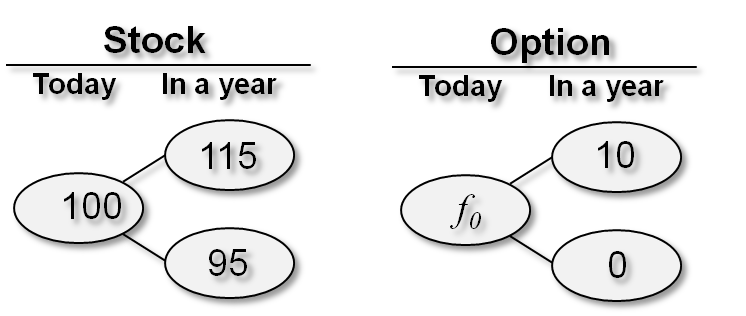
<figcaption aria-hidden="true">Option valueation</figcaption>
</figure>

The task is to determine the current option price, denoted as $f_0$ in
the figure above. We use $f_0$ instead of $c_0$ because we aim to
develop a general pricing method that applies to both put and call
options. In fact, this method can be used to price any derivative.

The key to solving this problem is recognizing that the same cash flow
can be replicated by borrowing money to finance a fraction of the shares
that the option delivers, regardless of whether the price goes up or
down. The reason this replication is possible is that an option’s value
is a function of the stock price. When the stock is worth 115, the
option will always be worth 15. When the stock is worth 95, the option
is always worthless. By substituting the stock price into this function,
we can determine the value of the option.

Now, suppose we borrow money to purchase a certain number of shares per
option, denoted by $\Delta$. For example, if we buy half as many shares
as options, then $\Delta = \frac{1}{2}$. Since the stock price is 100,
we buy shares worth:

<span id="eq-delta_example">$$
100 \cdot \Delta = 50
 \qquad(8)$$</span>

per option. After half a year ($T = \frac{1}{2}$), we must repay the
loan with interest, so the total repayment amount will be:

<span id="eq-repayment_example">$$
100 \cdot 1.05^{\tfrac{1}{2}} \cdot \Delta
 \qquad(9)$$</span>

If the share price rises, our account balance will then show a surplus
of:

<span id="eq-cf_up">$$
\Delta \cdot (115 - 100 \cdot 1.05^{\tfrac{1}{2}})
 \qquad(10)$$</span>

Similarly, we receive 15 on the option if the stock price goes up. If we
buy the option for $f_0$ today and fund it with a loan equal amount
$f_0$, we will next year have:

<span id="eq-option_up">$$
10 - f_0 \cdot 1.05^{\tfrac{1}{2}}
 \qquad(11)$$</span>

We can now select an appropriate proportion of shares $\Delta$ so that
these two transactions provide identical cash flows. This means that we
can find a fraction of shares $\Delta$ so that the leveraged purchase of
$\Delta$ shares give the same return as a similar purchase of the option
by solving the following equation for $\Delta$:
<span id="eq-no_arbitrage_up">$$
\Delta \cdot (115 - 100 \cdot 1.05^{\tfrac{1}{2}}) = 10 - f_0 \cdot 1.05^{\tfrac{1}{2}}
 \qquad(12)$$</span>

If the stock goes down, we can reason in exactly the same way. We get a
loss of

<span id="eq-cf_down">$$
\Delta \cdot (95 - 100 \cdot 1.05^{\frac{1}{2}})
 \qquad(13)$$</span>

on the share and a loss of

<span id="eq-option_down">$$
0 - f_0 \cdot 1.05^{\frac{1}{2}}
 \qquad(14)$$</span>

on the option. We require that the investments should provide the same
return, so we can set an equality between them:

<span id="eq-no_arbitrage_down">$$
\Delta \cdot (95 - 100 \cdot 1.05^{\frac{1}{2}}) = 0 - f_0 \cdot 1.05^{\frac{1}{2}}
 \qquad(15)$$</span>

We now have two relatively simple equations with two unknowns, $\Delta$
and $f_0$, which we can solve using sympy:

In [7]:
# Re-import necessary libraries since execution state was reset
import sympy as sp
from IPython.display import display, Markdown

# Define symbols
Delta, f0 = sp.symbols('Delta f0')

# Define the equations
eq1 = sp.Eq(Delta * (95 - 100 * 1.05**(1/2)), 0 - f0 * 1.05**(1/2))
eq2 = sp.Eq(Delta * (115 - 100 * 1.05**(1/2)), 10 - f0 * 1.05**(1/2))

# Solve for Delta and f0
sol = sp.solve((eq1, eq2), (Delta, f0))

# Display the solution
display(Markdown(f"$f_0={sol[f0]}$"))
display(Markdown(f"$\\Delta={sol[Delta]}$"))

<span id="eq-delta_sol">$$
\Delta = \tfrac{1}{2}
 \qquad(16)$$</span>

and

<span id="eq-f0_sol">$$
f_0 \approx 3.645
 \qquad(17)$$</span>

What we have done is find a combination of loans and equity investments
that produce the same return as an equivalent position in the option.
This is the fundamental principle behind all option pricing.

Thus, it is possible to achieve the same cash flows as the option by
holding a fraction $\Delta$ of the share. This principle applies
generally—an option can always be replicated by holding a portion of the
stock. In fact, many banks profit by issuing options and hedging them
through this replication strategy.

## A general binomial formula

When the stock and option can only take two values, we call this the
binomial option pricing model. While we could use the method above to
calculate the option price every time, it is much easier to apply a more
general formula. Let us introduce the following notation:

|  | **Today:** | **Expiration:** | Stock up | Stock down |
|------------------------|-------|------------|---------------|---------------|
| **The share price** | $S_0$ |  | $S_u$ | $S_d$ |
| **Option Value** | $f_0$ |  | $f_u$ | $f_d$ |
| **Price Ratio** $S_T/S_0$ |  |  | $u = S_u/S_0$ | $d = S_d/S_0$ |

Here, the subscripts *u* and *d* represent the up and down movements of
the stock, respectively. We use a general variable $f$ that can stand
for both a put ($P$) and a call option ($C$). Additionally, we define
two variables, $u$ and $d$, which represent the relative movement of the
stock price when it increases or decreases.

In our example, we are considering an option with a strike price
$X = 105$, where the stock can either rise to $S_u = 115$ or fall to
$S_d = 95$ from $S_0=100$. The interest rate is $r=0.05$ and time to
expiration is $T=0.5$, so

In [8]:
S_u = 115
S_d = 95
S_0 = 100
f_u = 10
f_d = 0
u = S_u/S_0
d = S_d/S_0
r = 0.05
T = 0.5

Now, instead of using specific numbers, we generalize the approach from
the previous section to find $f_0$.

As before, the investor buys $\Delta$ shares and borrows
$\Delta \cdot S_0$ to finance the purchase. Taking interest into
account, the investor must repay

<span id="eq-repay">$$
\Delta \cdot S_0 \cdot (1 + r)^T
 \qquad(18)$$</span>

after one year. If the stock price rises, the investor can sell the
stock for $S_u$ in the market. The resulting profit will be:

<span id="eq-up_delta_profit">$$
\Delta\cdot(S_u - S_0 \cdot(1+r)^T)
 \qquad(19)$$</span>

This should match the profit gained from financing the option purchase
with a loan. The option provides a payoff of $f_u$ when the stock price
rises. The loan that must be repaid consists of the initial purchase
price plus interest, which is:

<span id="eq-up_f_profit">$$
f_0 \cdot (1 + r)^T
 \qquad(20)$$</span>

Thus, the profit from the leveraged option purchase is:

<span id="eq-up_f">$$
f_u - f_0\cdot(1+r)^T
 \qquad(21)$$</span>

As before, we choose now a share of shares so that the profits of shares
and option price match. That is, we find a $\Delta$ such that:
<span id="eq-up_equation">$$
\Delta\cdot(S_u - S_0 \cdot(1+r)^T) = f_u - f_0\cdot(1+r)^T
 \qquad(22)$$</span>

Exactly the same argument applies if the stock goes down, so in that
case we need only replace subscript u with d:

<span id="eq-down_equation">$$
\Delta\cdot(S_d - S_0 \cdot(1+r)^T) = f_d - f_0\cdot(1+r)^T
 \qquad(23)$$</span>

## Risk-neutral probability

As in the previous section, we have two unknowns: the proportion of
$\Delta$ shares and the option price $f$, which can be easily solved. We
will not go into the full derivation of the solution here. However, it
turns out that the solution can be expressed in a relatively simple way
using a variable $q$, known as the “risk-neutral probability.” It is
calculated as:

<span id="eq-q_formula">$$
q=\frac{(1+r)^T-d}{u-d}
 \qquad(24)$$</span>

$q$ is really just a tool for calculating the option price and is not
actually a probability. However, it shares a key property with real
probabilities in that it always lies between zero and one. We use it to
compute an expectation in the same way as we do with normal
probabilities.

It is called “risk-neutral” because if we apply it to the terminal
values of the underlying stock ($S_u$ and $S_d$), the expected value
equals the current stock price plus interest:

<span id="eq-q_expectation">$$
\mathbb{E}_q[S_T] = S_u \cdot q + S_d \cdot (1-q) = S_0 \cdot (1+r)^T
 \qquad(25)$$</span>

We can verify this with sympy:

In [9]:
# Define symbols
Su, Sd, S0, r, T, q = sp.symbols('Su Sd S0 r T q')

u = Su/S0

d = Sd/S0

q = ((1+r)**T-d)/(u-d)

# The expected stock price under risk neutral probability
sp.simplify(Su * q + Sd * (1 - q))

Once we find $q$, the option price is simply given as the present value
of the expected option value at exercise, where we use the risk-neutral
probability $q$ as the probability of “up” and “down”.

The option price today is therefore:

<span id="eq-gen_formula">$$
f_0=\frac{q \cdot f_u + (1-q) \cdot f_d}{(1+r)^T}
 \qquad(26)$$</span>

We have discounted the expected value because $f_u$ and $f_d$ are not
present cash flows but represent cash flows at the terminal time $T$.

The process for calculating the price of a binomial option is as
follows:

1.  Calculate $u$ and $d$
2.  Calculate the risk-neutral probability $q$
    (<a href="#eq-q_formula" class="quarto-xref">24</a>)
3.  Calculate the present value of the expected option value using
    probability $q$
    (<a href="#eq-gen_formula" class="quarto-xref">26</a>)

Although we will not delve into the mathematics of more complex payoffs,
this illustrates a remarkably general principle: any derivative — a
financial security whose value depends on shares or other underlying
assets — can be priced using a probability distribution that ensures a
risk-neutral return for the stock.

Thus, the price of any derivative can be determined by defining an
appropriate risk-neutral probability distribution.

Additionally, note how we defined the option—not by first specifying the
exercise price, but simply by defining $f_u$ and $f_d$. This
demonstrates that our pricing method does not rely on the specific
structure of an option. Instead, all that is required is the
derivative’s payoff for a given payoff of the underlying asset.

In essence, this provides a general framework for pricing any contract
written on an asset.

## Option delta

Another important quantity is $\Delta$, which represents the number of
shares needed to replicate an option. It turns out that the delta is:

<span id="eq-gen_delta_formula">$$
\Delta=\frac{f_u-f_d}{S_u-S_d}
 \qquad(27)$$</span>

The $\Delta$ is useful because it indicates how many shares you must buy
to replicate the option. Since holding more shares increases risk, delta
also serves as a measure of the risk inherent in the option.

Delta can also be used to achieve the same exposure as holding the
underlying derivative. By frequently rebalancing so that your holdings
in the underlying asset adjust proportionally to the delta—typically on
a daily or weekly basis—your cash flow will closely mimic the exposure
of the derivative.

This strategy is known as *“delta hedging”*, and it is the method banks
use when issuing derivatives. By continuously adjusting their positions
in the underlying asset, banks hedge these products to ensure they do
not take on financial risk themselves.

## Using the General Binomial Formula

Let us apply the numbers from our example to the general binomial
formula to calculate the value of the option. We will then compare the
result with the solutions $\Delta = \tfrac{1}{2}$ and
$f_0 \approx 3.645$ obtained from solving the equations
(<a href="#eq-no_arbitrage_up" class="quarto-xref">12</a>) and
(<a href="#eq-no_arbitrage_down" class="quarto-xref">15</a>).

In [10]:
from IPython.display import display, Markdown

S_u = 115
S_d = 95
S_0 = 100
f_u = 10
f_d = 0
u = S_u/S_0
d = S_d/S_0
r = 0.05
T = 0.5

q = ((1+r)**T-d)/(u-d)
f0 = (q*f_u+(1-q)*f_d)/((1+r)**T)
delta = (f_u-f_d)/(S_u-S_d)

display(Markdown(f"$f_0={f0}$"))
display(Markdown(f"$\\Delta={delta}$"))

Wich we see corresponds with the previous calculations.

# The stock price process

Before we explore how contracts on assets with continuous rather than
binomial prices are valued, we must first understand how stock prices
are modeled in modern finance. This modeling approach provides a
practical way to describe stock price movements in mathematical terms.

Let us begin by plotting some actual intraday prices. The blue line in
<a href="#fig-intraday" class="quarto-xref">Figure 7</a> shows a
snapshot of the intraday price movements for the Norwegian company
Equinor on March 24, 2025.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Read the data
df = pd.read_csv('data/'
            'equinor_intraday_240325.csv')
df['TID'] = pd.to_datetime(df['TID'], 
                        format='%H:%M:%S')
df = df.sort_values('TID')
df=df[df['TID']>=pd.to_datetime('9:00:00', 
                            format='%H:%M:%S')]
df=df[df['TID']<=pd.to_datetime('16:00:00', 
                            format='%H:%M:%S')] 

def create_canvas():
  # Create figure and axis objects
  fig, ax = plt.subplots(figsize=(10, 5))

  # Set major ticks to round hours every hour
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

  # Rotate x-axis labels for readability
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

  # Labels and title
  ax.set_xlabel('Time')
  ax.set_ylabel('Price')
  ax.set_title('Equinor Intraday Price')

  return ax

ax = create_canvas()

#Plot the data
ax.plot(df['TID'], df['PRIS'])

We observe that the price appears to move almost continuously. However,
if you modify the time window in the code—for example, from 13:00 to
13:05—you will notice that the movements are not continuous at all, but
rather a sequence of discrete price changes.

Additionally, we see that stock prices take only certain values. For
Equinor, the smallest price increment is NOK 0.05, meaning that stock
prices move in discrete steps both in time and value. Despite this,
assuming continuous time and continuous prices is mathematically
convenient and serves as a reasonable approximation, especially over
longer time intervals, such as an hour or more of trading.

Therefore, stock price movements are often modeled as a continuous
process, which is the approach we will take in this lecture.

## Modeling the stock price

Let us now examine how financial economists model stock prices to
replicate actual price movements as closely as possible. In
<a href="#fig-intraday_sim" class="quarto-xref">Figure 8</a>, a stock
price process is simulated using the standard approach in finance and
presented alongside the actual stock price of Equinor.

In [12]:
#Simulation:

#Calculating the mean and volatility
mu = np.log(df['PRIS']).diff().mean()
sigma = np.log(df['PRIS']).diff().std()

#The Wiener process
dlnS = (mu - 0.5 * sigma**2 
            + sigma * np.random.randn(len(df)))

#Ensuring the proces starts at the same point, 
#and calulating the level
dlnS[0] = 0
df['PRIS_sim'] = (df['PRIS'].iloc[0] 
                        * np.exp(np.cumsum(dlnS)))

#plotting:
ax = create_canvas()
ax.plot(df['TID'], df['PRIS'])
ax.plot(df['TID'], df['PRIS_sim'])
ax.legend(['Real', 'Simulated'], frameon=False)

The orange line in
<a href="#fig-intraday_sim" class="quarto-xref">Figure 8</a> represents
simulated prices, meaning that each time the code is executed, the
orange path will vary.

You can see this from the formula in
<a href="#fig-intraday_sim" class="quarto-xref">Figure 8</a>, but we
will now take a closer look at how stock prices are typically modeled in
finance. We start with a model based on the relative *geometric* change
in stock prices. By relative geometric change, we mean to the log
difference, defined as:

<span id="eq-logdiff_def">$$
\Delta \log(S_t) = \log(S_t) - \log(S_{t-1}) = \Delta s_t
 \qquad(28)$$</span>

Alternatively, we could consider the *discrete percentage difference*:

$$
\Delta S_t / S_t
$$

However, using log differences instead of percentage differences has a
key advantage: the latter is *not symmetric*. If a stock price increases
by 10% and then decreases by 10%, it does not return to its original
level. In contrast, with log differences, a 10% increase followed by a
10% decrease brings the stock price *exactly* back to its starting
point.

Log differences are closely related to *continuous compounding* and the
*exponential function*. Since the logarithm is the inverse of the
exponential function, the following identity holds for any $x$:

In [13]:
import numpy as np
x = 23.434
np.exp(np.log(x))

23.434

Thus, if we know the log change $\Delta s_t$ over a given period, it
follows directly from
(<a href="#eq-logdiff_def" class="quarto-xref">28</a>) that the stock
price at time $t$ is given by:

<span id="eq-price_log_diff">$$
S_t = S_0 \cdot e^{s_t}
 \qquad(29)$$</span>

The log change in stock price consists of three key components: *drift,
volatility correction, and innovation*, which will now be explained in
more detail:

### Innovation

Since stock prices are not fully predictable, we need to introduce a
random element. This randomness should be structured so that the
variance increases proportionally with time. This assumption is
reasonable because it implies that the stock price two months from now
will have twice the variance — and thus twice the risk — of the stock
price one month from now.

This simple assumption can be expressed as

<span id="eq-wiener">$$
z_{t} = \varepsilon_{t}\sqrt{t}
 \qquad(30)$$</span>

where $\varepsilon_{t}$ is standard normally distributed,
$\varepsilon_{t} \sim N(0,1)$, meaning it has a mean of zero and
variance of one.

The standard random variable is multiplied by the square root of $t$,
ensuring that:

<span id="eq-var_deltaz">$$
Var(z_t) = t
 \qquad(31)$$</span>

A random variable that increases in variance with time is called a
Wiener Process. The further into the future, the less we know about the
stock price.

The actual innovation also has a scale parameter $\sigma$, so that the
innovation to the price becomes:

<span id="eq-sigma_zt">$$
\sigma \cdot z_t
 \qquad(32)$$</span>

The associated variance is proportional to the time period:

<span id="eq-var_sigma_zt">$$
var(\sigma \cdot z_t) = \sigma^2 \cdot t
 \qquad(33)$$</span>

When simulating, we want to draw each innovation in the process $z_t$,
in other words, we want to draw the change in $z_t$. Change is as usual
indicated by $\Delta$, so that the innovation per observation becomes

<span id="eq-sigma_delta_zt">$$
\sigma \cdot \Delta z_t
 \qquad(34)$$</span>

The associated variance is then:

<span id="eq-var_deltaz">$$
var(\sigma \cdot \Delta z_t) = \sigma^2 \cdot \Delta t
 \qquad(35)$$</span>

This means that the variance of each period in the Wiener Process $z_t$
is directly proportional to the length of the period.

In the specific dataset used for
<a href="#fig-intraday" class="quarto-xref">Figure 7</a>, the time
intervals between observations vary because the data is based on
transaction records. The time period is determined by the actual time
elapsed between consecutive data points. However, in most financial
models, $\Delta t$ is typically assumed to be constant.

For simplicity, in the simulation shown in
<a href="#fig-intraday_sim" class="quarto-xref">Figure 8</a>, we assume
that the time step between observations is fixed at $\Delta t = 1$. To
create a process that closely replicates Equinor’s price movements, we
estimate the period volatility using the standard deviation of the log
price differences between observations:

In [14]:
sigma = np.log(df['PRIS']).diff().std()

The implementation of the innovation term from
(<a href="#eq-sigma_delta_zt" class="quarto-xref">34</a>) in the code is
then:

In [15]:
sigma * np.random.randn(len(df));

Here, `np.random.randn(len(df))` generates random draws from a standard
normal distribution, representing $\varepsilon_{t}$, while multiplying
by `sigma` scales the randomness according to the estimated volatility
of the stock price.

### Drift

The stock price is expected to change by a certain percentage each
period. This expectation is captured by a drift term $\mu$, which
represents the average rate of return per time unit. On average, the
stock price is expected to increase by $\mu \Delta t$ in each period.

By combining this deterministic drift term with the stochastic Wiener
process, we obtain the full stock price process.

In the code for
<a href="#fig-intraday" class="quarto-xref">Figure 7</a>, the drift term
is estimated as the mean log price change of Equinor throughout the
trading day:

In [16]:
mu = np.log(df['PRIS']).diff().mean()

Mathematicaly the drift can be written

<span id="eq-logdiff_drift_innov">$$
\mu \cdot \Delta t
 \qquad(36)$$</span>

In the calculation of
<a href="#fig-intraday" class="quarto-xref">Figure 7</a>, $\Delta t = 1$

### Volatility Correction

If we were to define the change in log price using only the drift and
innovation terms, as in
(<a href="#eq-logdiff_drift_innov" class="quarto-xref">37</a>) and
(<a href="#eq-sigma_delta_zt" class="quarto-xref">34</a>), the
cumulative log price change from time 0 to $t$ would be:

<span id="eq-logdiff_drift_innov">$$
s_t = \mu \cdot t + \sigma \cdot z_t
 \qquad(37)$$</span>

Substituting this into the exponential price model from
(<a href="#eq-price_log_diff" class="quarto-xref">38</a>) gives:

<span id="eq-price_log_diff">$$
S_t = S_0 \cdot e^{\mu \cdot t + \sigma \cdot z_t}
 \qquad(38)$$</span>

However, as we previously discussed in
<a href="#fig-jensen" class="quarto-xref">Figure 3</a>, this expression
ignores the effect of Jensen’s inequality. Because the exponential
function is convex, the expected value of $S_t$ is greater than the
expected value of the log price change:

<span id="eq-incorrect_exp">$$
\mathbb{E}[S_t] > S_0 \cdot e^{\mu \cdot t}
 \qquad(39)$$</span>

We do know, however, what accounts for this difference between the
expectation of the function and the function of the expectation. By
adding a correction term

<span id="eq-volatility_correction">$$
-\tfrac{1}{2} \sigma^2 t
 \qquad(40)$$</span>

we can adjust for Jensen’s inequality exactly. That is, we know that

<span id="eq-correct_exp">$$
\mathbb{E}[S_t] = S_0 \cdot e^{\mu \cdot t - \tfrac{1}{2} \sigma^2 t}
 \qquad(41)$$</span>

### Putting It All Together

By combining the innovation term
(<a href="#eq-sigma_delta_zt" class="quarto-xref">34</a>), the
volatility correction term
(<a href="#eq-volatility_correction" class="quarto-xref">40</a>), and
the drift component from
(<a href="#eq-logdiff_drift_innov" class="quarto-xref">37</a>), we
arrive at a realistic model for the log change in stock price:

<span id="eq-logdiff_model">$$
\Delta s_t = \mu \cdot \Delta t - \tfrac{1}{2} \sigma^2 \Delta t + \sigma \cdot \Delta z_t
 \qquad(42)$$</span>

This leads to the full model for the stock price at any point in time:

<span id="eq-final_price_model">$$
S_t = S_0 \cdot e^{\mu \cdot t - \tfrac{1}{2} \sigma^2 \cdot t + \sigma \cdot z_t}
 \qquad(43)$$</span>

Using (<a href="#eq-logdiff_model" class="quarto-xref">42</a>), the
Python implementation therefore becomes

In [17]:
dlnS = (mu - 0.5 * sigma**2 
            + sigma * np.random.randn(len(df)))

df['PRIS_sim'] = (df['PRIS'].iloc[0] 
                        * np.exp(np.cumsum(dlnS)))

Here, `np.cumsum(dlnS)` computes the cumulative sum of log changes
across all observations in the dataset, giving the full simulated price
path.

# Risk neutral pricing

In the original papers, the derivation of the Black and Scholes option
pricing formula, uses som pretty fancy math and sophisticated theory.
However, if we know that we can price any derivative using risk neutral
expectations, it becomes easier to understand how derivatives are
priced.

For example the Black-Scholes-Merton option pricing fomula can be
obtained by applying risk netural pricing. That involves calculating
this integral

<span id="eq-bs_expectation_call">$$
f_0 = e^{-rt} \int_{-\infty}^{\infty} \max \left( S_0 e^{(r - \tfrac{1}{2} \sigma^2)t + \sigma \sqrt{t} \epsilon} - X, 0 \right) \phi(\epsilon) d\epsilon
 \qquad(44)$$</span>

Here - $f_0$ is the valuation - $e^{-rT}$: Is the contnously compunded
discount factor (time value of money). -
$S_t = S_0 e^{(r - \frac{1}{2} \sigma^2)T + \sigma \sqrt{T} \epsilon}$
is the value of the option at time $t$ - $X$ is the strike price -
$\phi(\epsilon)$ is the standard normal density function.

We will not go through the calculations in this course, but it turns out
that the solution to this integral is the Black-Scholes-Merton call
option formula:

<span id="eq-bs_call">$$
C(S, X, T, r, \sigma) = S \Phi(d_1) - X e^{-rT} \Phi(d_2)
 \qquad(45)$$</span>

where

<span id="eq-bs_call_d1">$$
d_1 = \frac{\ln(S / X) + \left(r + \frac{1}{2} \sigma^2 \right)T}{\sigma \sqrt{T}}
 \qquad(46)$$</span>

and

<span id="eq-bs_call_d2">$$
d_2 = d_1 - \sigma \sqrt{T}
 \qquad(47)$$</span>

$\Phi$ is the cumulative standard normal distribution function.

Here’s an improved version of your section for clarity, flow, and
grammar, while keeping the technical content intact:

------------------------------------------------------------------------

## Numerical Approximation

Knowing that we can price derivatives using risk-neutral expectations
means that we can, in principle, determine the fair value of almost any
contract written on tradable assets. The expected value is defined as
the sum of outcomes (or events) weighted by their probabilities. For
example, the expected value of a die roll is:

<span id="eq-dice">$$
(1+2+3+4+5+6) \cdot \frac{1}{6} = 3.5
 \qquad(48)$$</span>

that is, each outcome multiplied by its probability, summed over all
outcomes.

As mentioned above, when we are dealing with a continuous distribution
such as the normal distribution, the discrete concept of a probability
is replaced by the probability density $\phi(x)$ multiplied by a small
interval $dx$. The outcome is the derivative’s value, and the summation
becomes an integral.

However, solving such integrals analytically is often difficult or
impossible. In practice, it is therefore common to compute the integral
numerically. This involves converting the continuous distribution into a
discrete one, allowing us to approximate the integral using a finite sum
over discrete probabilities and outcomes.

This discretization means dividing the range of outcomes into intervals
and calculating the probability mass in each interval. In other words,
we approximate the continuous probability density by a histogram-like
representation.

This process is illustrated in
<a href="#fig-nummerical_approx" class="quarto-xref">Figure 9</a>. Each
bar represents the probability of an outcome falling within a given
interval. We can then approximate the expected value by multiplying each
outcome $x$ by its associated probability, $\phi(x) \cdot dx$, where
$dx$ is the interval width. In this case, the range is defined as ±5
standard deviations, divided into 30 intervals.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0.15  # Risk-free rate
sigma = 0.2  # Volatility
width = 5
N = 30

# Define the range for x
dx = width*sigma/((N-1)*0.5)
x = np.arange(mu - 4*sigma, mu + width*sigma, dx)
x_fine = np.linspace(mu - width*sigma, mu + width*sigma, 1000)


# PDF values
pdf = norm.pdf(x, mu, sigma)
pdf_fine = norm.pdf(x_fine, mu, sigma)


# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_fine, pdf_fine, label='Normal PDF', color='blue')
plt.bar(x, pdf, width=dx, alpha=0.5, align='center', label='PDF * dx (approximation)', edgecolor='black')
plt.title('Numerical Approximation of Expectation using PDF * dx')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Great point — thanks for the clarification! Here’s the revised version
with proper `{python}` code block tags so it works in Quarto/Markdown
environments like Jupyter Book, Quarto documents, or R Markdown:

------------------------------------------------------------------------

### A Simple Function for Valuing a Derivative

To compute the expected value of a derivative, we need to evaluate the
probability of each small interval on the $x$-axis and multiply it by
the corresponding derivative payoff. For a simple normally distributed
variable, the probability of each interval can be approximated as:

In [19]:
import scipy.stats as stats
p = stats.norm.pdf(x, mu, sigma) * dx

However, as we saw when modeling the stock price process, the mean is
not simply $\mu$, and the volatility is not simply $\sigma$. According
to Equation
<a href="#eq-final_price_model" class="quarto-xref">Equation 43</a>,
after adjusting for the time to maturity and the volatility correction,
the mean of the log return becomes:

<span id="eq-mean_stockprocess">$$
(\mu - \tfrac{1}{2} \sigma^2) \cdot T
 \qquad(49)$$</span>

Since we are working under the risk-neutral measure, we replace the
expected return $\mu$ with the risk-free rate $r$, resulting in:

<span id="eq-riskneutral_mean">$$
(r - \tfrac{1}{2} \sigma^2) \cdot T
 \qquad(50)$$</span>

The corresponding volatility over the time horizon $T$ becomes:

<span id="eq-volatility_scaled">$$
\sigma \cdot \sqrt{T}
 \qquad(51)$$</span>

With these substitutions, the discrete risk-neutral probability
distribution used to price a derivative is:

In [20]:
import scipy.stats as stats
p = stats.norm.pdf(x, (r - 0.5 * sigma**2) * T, sigma * np.sqrt(T)) * dx

Using this setup, we can now define a simple and general function for
computing the risk-neutral expected value of a derivative with terminal
payoff $f(S_T)$:

In [21]:
import numpy as np
import scipy.stats as stats

def derivative_value_risk_neutral(f, S0, sigma, r, T, N=1000, width=5):
    """
    Numerically computes the risk-neutral value of a derivative with payoff function f(S_T).
    
    Parameters:
    - f: Payoff function f(S_T)
    - S0: Initial stock price
    - sigma: Volatility
    - r: Risk-free interest rate
    - T: Time to maturity
    - N: Number of intervals for numerical integration
    - width: Number of standard deviations to cover on each side
    
    Returns:
    - Present value of the derivative
    """
    vol_T = sigma * np.sqrt(T)
    mu_T = (r - 0.5 * sigma**2) * T

    x = np.linspace(-width * vol_T, width * vol_T, N)
    dx = x[1] - x[0]
    
    ST = S0 * np.exp(x)
    p = stats.norm.pdf(x, mu_T, vol_T) * dx
    
    pv = np.exp(-r * T) * np.sum(f(ST) * p)
    return pv

This function allows you to numerically evaluate the fair value of any
derivative written on the terminal asset price $S_T$, using risk-neutral
expectations.

In [22]:
import scipy.stats as stats
def derivative_value_risk_neutral(f, S0, sigma, r, T, N = 1000, width = 5):
    "Calculates the risk neutral value of f"
    x = np.linspace(-width*sigma*(T**0.5), width*sigma*(T**0.5), N)
    dx = width*sigma*(T**0.5)/((N-1)*0.5)
    p = stats.norm.pdf(x, (r-0.5*sigma**2)*T, sigma*(T**0.5))*dx
      
    pv = np.exp(-r*T)*np.sum(f(S0*np.exp(x))*p)

    return pv

### Testing the derivative valuation function

Now, let us test if this function works. We can do that by comparing it
with the known Black&Scholes formula. The following defines the terminal
value of the call option, and the Black&Scholes formula:

In [23]:
import scipy.stats as stats
X = 105   # Strike price
def call_option(ST):
    # Call option payoff function
    
    return np.maximum(ST - X, 0)



def black_scholes(S0, X, r, sigma, T):
    d1 = (np.log(S0/X) + (r + 0.5*sigma**2)*T)/(sigma*(T**0.5))
    d2 = d1 - sigma*(T**0.5)
    return S0*stats.norm.cdf(d1) - X*np.exp(-r*T)*stats.norm.cdf(d2)    

In [24]:
import numpy as np
import scipy.integrate as integrate
import scipy.stats as stats

# Define parameters
S0 = 100  # Initial stock price

r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1  # Time to maturity (1 year)


f0_num = derivative_value_risk_neutral(call_option, S0, sigma, r, T)
f0_bs = black_scholes(S0, X, r, sigma, T)

print(f"Numerical integral result: {f0_num}")
print(f"Black-Scholes result: {f0_bs}")
# Check if the results are close    
assert np.isclose(f0_num, f0_bs, atol=1e-4), "The results are not close!"

Numerical integral result: 8.021228881041875
Black-Scholes result: 8.021352235143176

As we can see, our discrete valuation function works very well. With
this simple approach, we can accurately value any contract written on
the terminal asset price $S_T$.

Bachelier, Louis. 1900. *Théorie de La Spéculation*. Paris:
Gauthier-Villars.

Jensen, Johan W. 1906. “Sur Les Fonctions Convexes Et Les Inégalités
Entre Les Valeurs Moyennes.” *Acta Mathematica* 30: 175–93.
<https://doi.org/10.1007/BF02418571>.

Merton, Robert C et al. 1971. “Theory of Rational Option Pricing.”

Scholes, Myron, and Fischer Black. 1973. “The Pricing of Options and
Corporate Liabilities.” *Journal of Political Economy* 81 (3): 637–54.